<a href="https://colab.research.google.com/github/sclaudiobr/covid2019/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet - previsão de dados com framework prophet

## Formato de dados e colunas
<p> datas (ds)
<p> variável (y)

*por: Claudio R. O da Silva*

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
# Aqui, configuramos o acesso ao reposiório e exportação para o formato pandas Dataframe (tabela)
# Observe que aqui usei o terminal LINUX do COLAB para a importacao e descompactação do arquivo.
!wget https://data.brasil.io/dataset/covid19/caso.csv.gz
!gunzip caso.csv.gz
df = pd.read_csv("caso.csv")
df.head(10)
covid = df

--2020-09-15 18:08:13--  https://data.brasil.io/dataset/covid19/caso.csv.gz
Resolving data.brasil.io (data.brasil.io)... 104.26.8.175, 172.67.71.45, 104.26.9.175, ...
Connecting to data.brasil.io (data.brasil.io)|104.26.8.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7268335 (6.9M) [application/gzip]
Saving to: ‘caso.csv.gz’

caso.csv.gz         100%[===================>]   6.93M  8.05MB/s    in 0.9s    

2020-09-15 18:08:14 (8.05 MB/s) - ‘caso.csv.gz’ saved [7268335/7268335]

gzip: caso.csv already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [5]:
covid.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
684903,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,3533809.0,40.0641,0.0
684904,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,3533809.0,40.0641,0.0
684905,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,3533809.0,40.0641,0.0
684906,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,3533809.0,40.0641,0.0
684907,2020-06-19,SP,Óleo,city,1,0,1,False,2496.0,3533809.0,40.0641,0.0


In [6]:
#covid.rename(columns ={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)
covid.rename(columns ={'date':'Date','state':'Country','deaths':'Deaths','confirmed':'Confirmed'}, inplace=True)

In [7]:
covid.tail()

,Date,Country,city,place_type,Confirmed,Deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
684903,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,3533809.0,40.0641,0.0
684904,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,3533809.0,40.0641,0.0
684905,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,3533809.0,40.0641,0.0
684906,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,3533809.0,40.0641,0.0
684907,2020-06-19,SP,Óleo,city,1,0,1,False,2496.0,3533809.0,40.0641,0.0


In [8]:
from datetime import datetime as dt

In [9]:
# numero de mortes
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()
mortes['Date'] = pd.to_datetime(mortes['Date'])

In [10]:
confirmados = covid.groupby('Date').sum()['Confirmed'].reset_index()
confirmados.tail()
confirmados['Date'] = pd.to_datetime(confirmados['Date'])

In [11]:
confirmados.columns = ['ds','y']

In [12]:
# tratamento dos dados para o prophet - renomeando
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
198,2020-09-10,250559
199,2020-09-11,251851
200,2020-09-12,247192
201,2020-09-13,234893
202,2020-09-14,217106


In [13]:
confirmados['ds'] = pd.to_datetime(confirmados['ds'])
confirmados.tail()

,ds,y
198,2020-09-10,8112937
199,2020-09-11,8280124
200,2020-09-12,8006478
201,2020-09-13,7978399
202,2020-09-14,7233536


In [14]:
# formatando data
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
198,2020-09-10,250559
199,2020-09-11,251851
200,2020-09-12,247192
201,2020-09-13,234893
202,2020-09-14,217106


In [15]:
dias = 90
m = Prophet(interval_width= 0.95)
m.fit(confirmados)
futuro = m.make_future_dataframe(periods=dias)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# uso do prophet
dias = 30
m = Prophet(interval_width= 0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#futuro.tail(dias)

In [17]:
previsao = m.predict(futuro)
#previsao.tail(dias)

In [18]:
previsao[['ds', 'yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
203,2020-09-15,244910.886273,254920.483583,265454.637325
204,2020-09-16,246082.269085,257075.589750,266351.673007
205,2020-09-17,248095.802732,258343.196341,268583.290589
206,2020-09-18,249017.398253,259287.577950,269259.728539
207,2020-09-19,247531.112853,257943.398650,267258.189911
208,2020-09-20,252272.665560,261754.637249,271505.331690
209,2020-09-21,252390.250785,261484.526117,271108.495682
210,2020-09-22,254923.341031,265527.697003,275870.666912
211,2020-09-23,257023.027905,267682.803170,278959.814565
212,2020-09-24,258842.634896,268950.409761,278638.654415


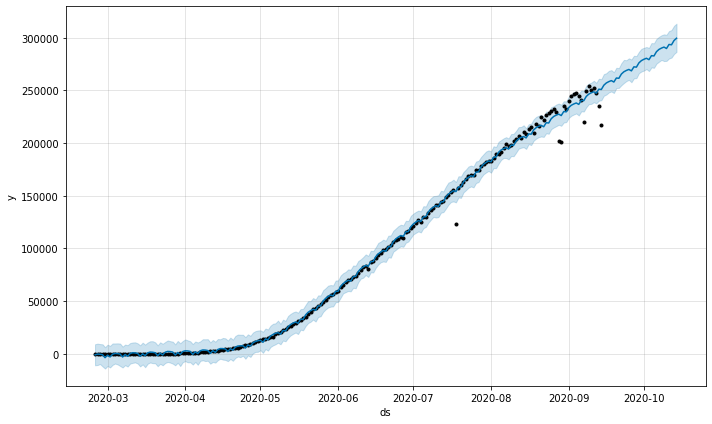

In [19]:
confirmed_forecast_plot = m.plot(previsao)

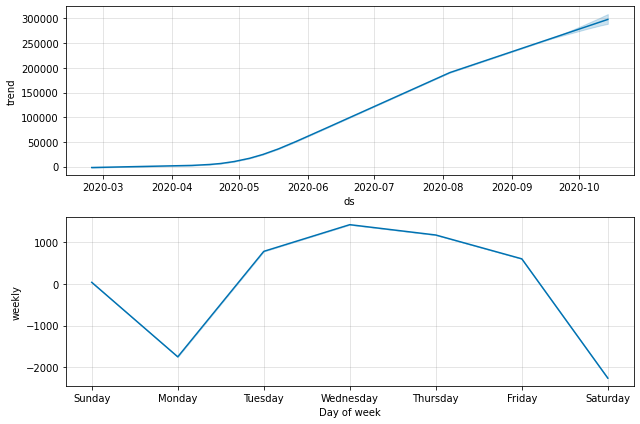

In [20]:
fig2 = m.plot_components(previsao)